In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimpy import skim
import plotly.express as px
import plotly.graph_objects as go
from plotly._subplots import make_subplots
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
colors = ['#DB1C18','#DBDB3B','#51A2DB']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
%matplotlib inline

In [7]:
pd.set_option('display.max_colwidth', 180)

In [8]:
df = pd.read_csv(r"C:\Users\danielkwakye\Downloads\Country-data.csv")
data_dict = pd.read_csv(r"C:\Users\danielkwakye\Downloads\data-dictionary.csv")

In [9]:
data_dict

Column Name  \
0     country   
1  child_mort   
2     exports   
3      health   
4     imports   
5      Income   
6   Inflation   
7  life_expec   
8   total_fer   
9        gdpp   

                                                                                                        Description  
0                                                                                               Name of the country  
1                                                       Death of children under 5 years of age per 1000 live births  
2                                     Exports of goods and services per capita. Given as %age of the GDP per capita  
3                                                 Total health spending per capita. Given as %age of GDP per capita  
4                                     Imports of goods and services per capita. Given as %age of the GDP per capita  
5                                                                                             Net income per person  
6                                                        The measurement of the annual growth rate of the Total GDP  
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8       The number of children that would be born to each woman if the current age-fertility rates remain the same.  
9                                  The GDP per capita. Calculated as the Total GDP divided by the total population.

In [10]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 167    │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 10     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0       ┃ p25    ┃ p50   ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ child_mort     │   0 │      0 │   38.27 │   40.33 │      2.6 │   8.25 │  19.3 │   62.1 │     208 │  ▇▂▁▁   │  │
│ │ exports        │   0 │      0 │   41.11 │   27.41 │    0.109 │   23.8 │    35 │  51.35 │     200 │   ▇▇▂   │  │
│ │ health         │   0 │      0 │   6.816 │   2.747 │     1.81 │   4.92 │  6.32 │    8.6 │    17.9 │  ▃▇▅▂   │  │
│ │ imports        │   0 │      0 │   46.89 │   24.21 │   0.0659 │   30.2 │  43.3 │  58.75 │     174 │   ▃▇▃   │  │
│ │ income         │   0 │      0 │   17140 │   19280 │      609 │   3355 │  9960 │  22800 │  125000 │   ▇▂▁   │  │
│ │ inflation      │   0 │      0 │   7.782 │   10.57 │    -4.21 │   1.81 │  5.39 │  10.75 │     104 │   ▇▂    │  │
│ │ life_expec     │   0 │      0 │   70.56 │   8.893 │     32.1 │   65.3 │  73.1 │   76.8 │    82.8 │   ▁▃▆▇  │  │
│ │ total_fer      │   0 │      0 │   2.948 │   1.514 │     1.15 │  1.795 │  2.41 │   3.88 │    7.49 │  ▇▅▁▂▁  │  │
│ │ gdpp           │   0 │      0 │   12960 │   18330 │      231 │   1330 │  4660 │  14050 │  105000 │   ▇▁▁   │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴──────────┴────────┴───────┴────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ country                   │       0 │          0 │                          1.2 │                      204 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**Except country feature, other features are either float or integer. there is no text data in the dataframe**

Statistical Analysis

In [13]:
df.shape

(167, 10)

**There are 167 rows and 10 columns(features)**

In [14]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

**Observations:**

**child_mort, exports, imports, income, inflation, gdpp - seems to have large difference between 75% percentile and max value. it looks like these features are right scewed.**

In [15]:
df['country'].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

**Observations**

**country feature is identical value, cant be considered as categorical as there is no multiple entries. so, this particular feature might not be helpful for the modeling. but, we shall use for EDA.**

In [16]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**Fortunately there is no null value identified.**

In [17]:
df['country'].count()

167

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

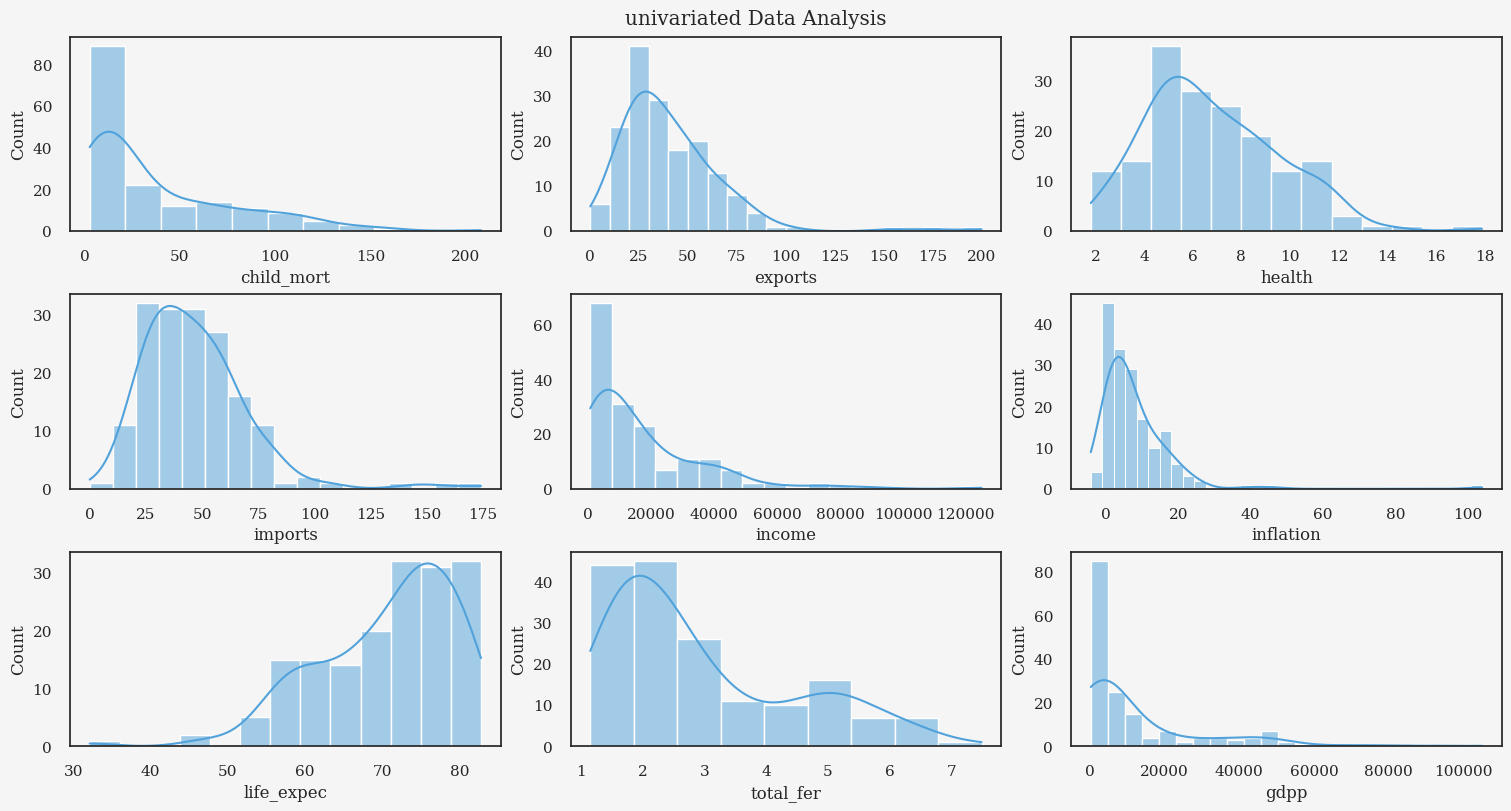

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8),constrained_layout=True)
plt.suptitle('univariated Data Analysis')
ax=ax.flatten()
int_cols=df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.histplot(df[i], ax=ax[x], kde=True, color=colors[2])

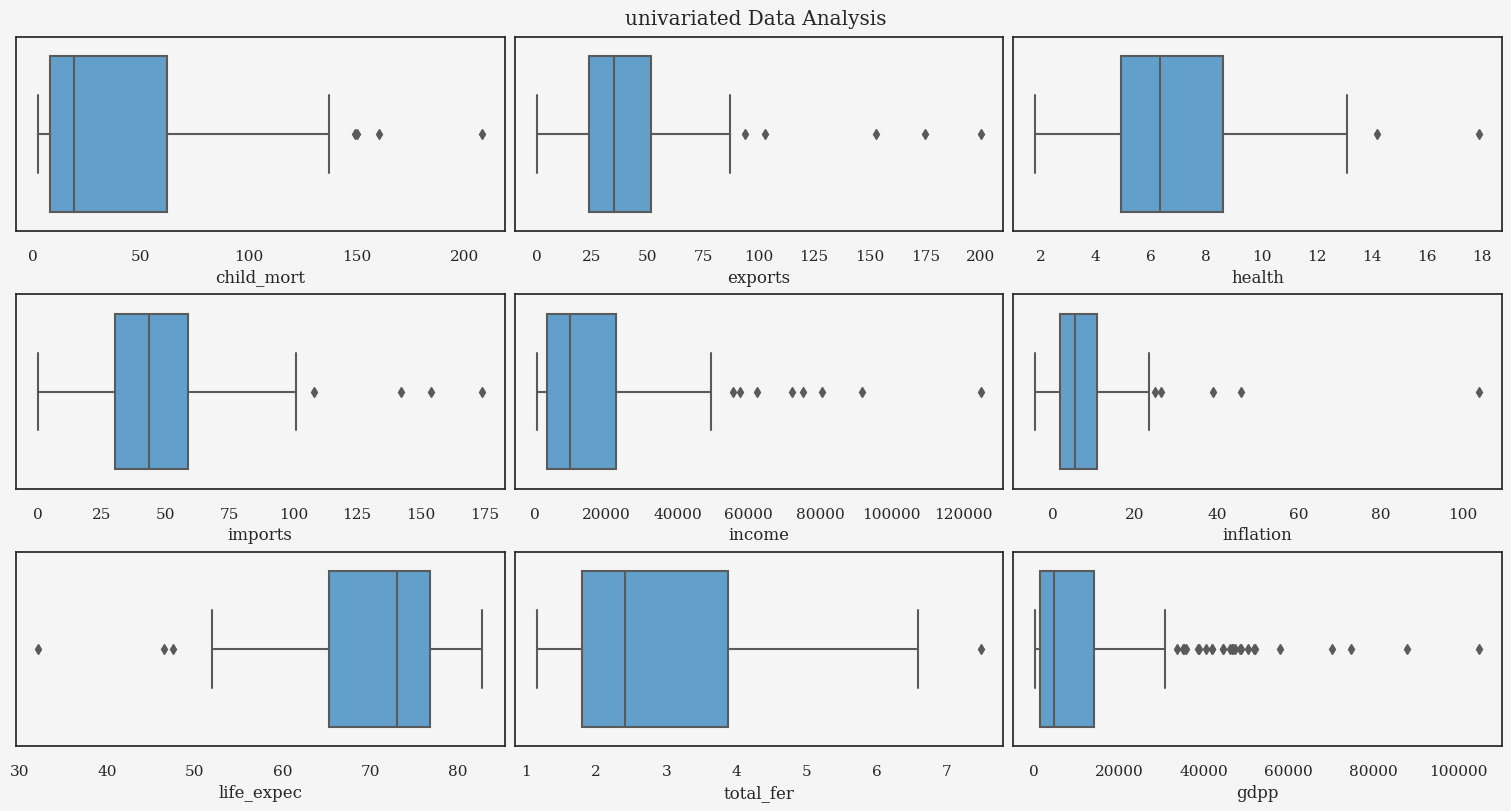

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8),constrained_layout=True)
plt.suptitle('univariated Data Analysis')
ax=ax.flatten()
int_cols=df.select_dtypes(exclude='object').columns
for x, i in enumerate(int_cols):
    sns.boxplot(x=df[i], ax=ax[x], color=colors[2])

***Observations***

1. **Both Histogram and the boxplot clearly shows that the numerical features are contineous or discreate values. there are no features with categorical values.**
2. **Box plot shows us there are clear outliers in child_mort, exports, imports, income, gdpp features. however, these informations are belongs to each country. so, we can't expect the values to be normaly distributed wihtout outliers.**
3. **Also, the problem statement clearly describes the we need to cluster the countries that need help. so, there are clustering algorithms like Manhaten distance are less sensible to outliers.**

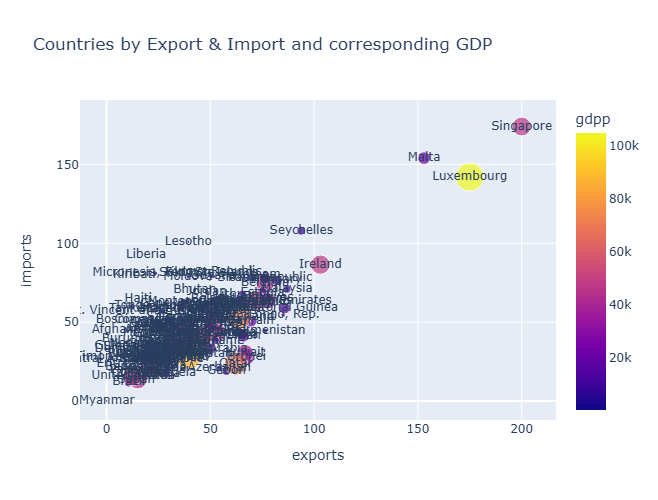

In [20]:
#plt.figure(figsize=(20,6))
px.scatter(data_frame=df, x='exports', y='imports', size='gdpp', 
           text='country', color='gdpp', 
           title='Countries by Export & Import and corresponding GDP', height=500)#, 
        #width=900,height=0)

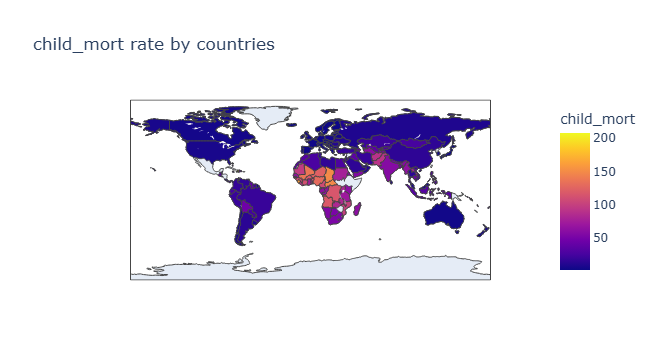

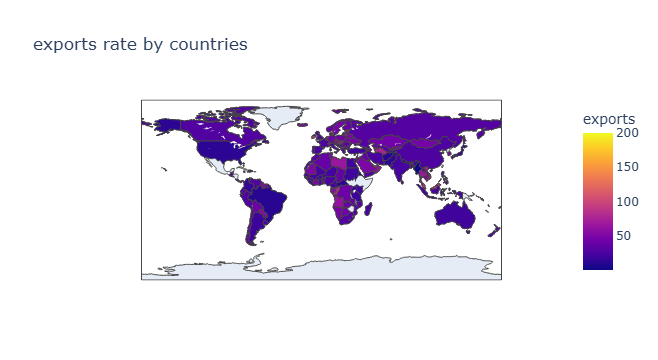

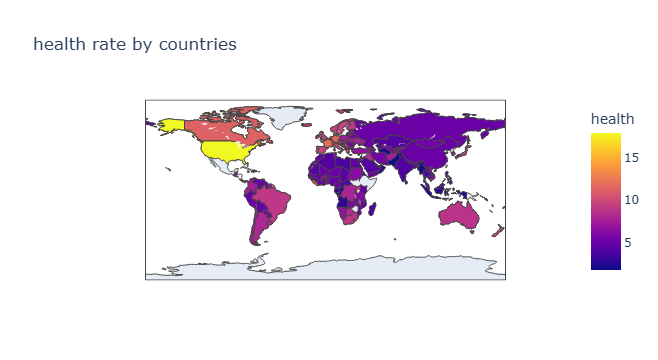

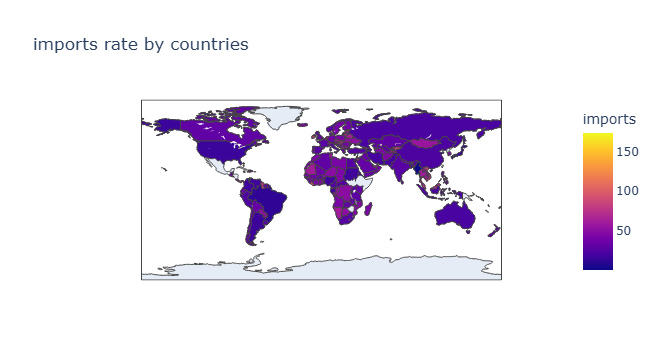

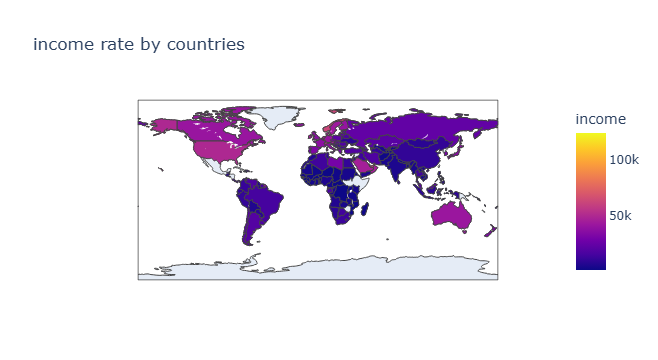

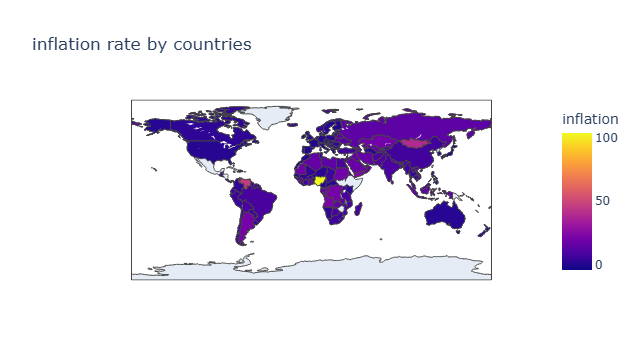

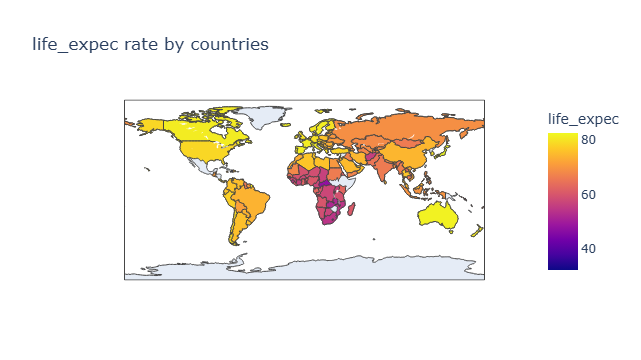

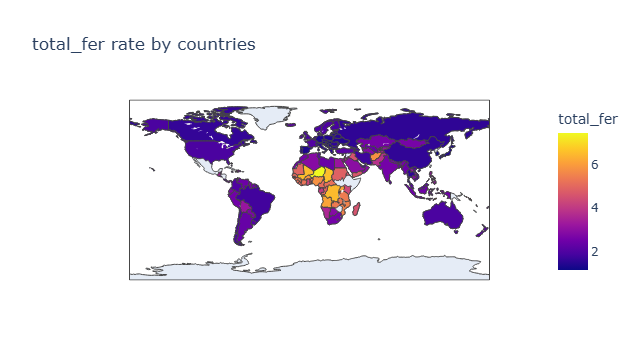

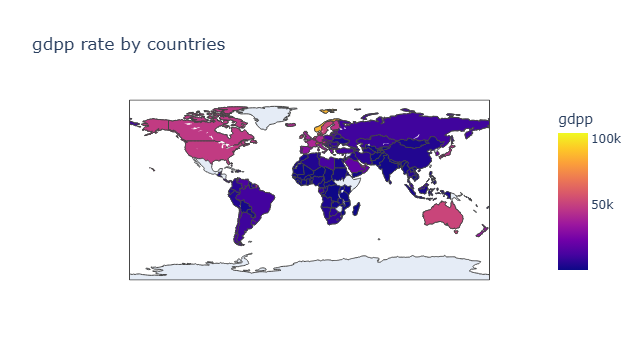

In [21]:
figures = []
for i in int_cols:
    fig=px.choropleth(data_frame=df, locationmode='country names'
                      , locations='country', color=i, title=f'{i} rate by countries')
    fig.show()
    #Display all figures
for fig in figures:
    display(fig)

**From the above Graphs we can clearly see that there are 2 clusters. Aftican and south Asian countires and rest of the world countries. however, further exploration would help us to learn better**

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is 

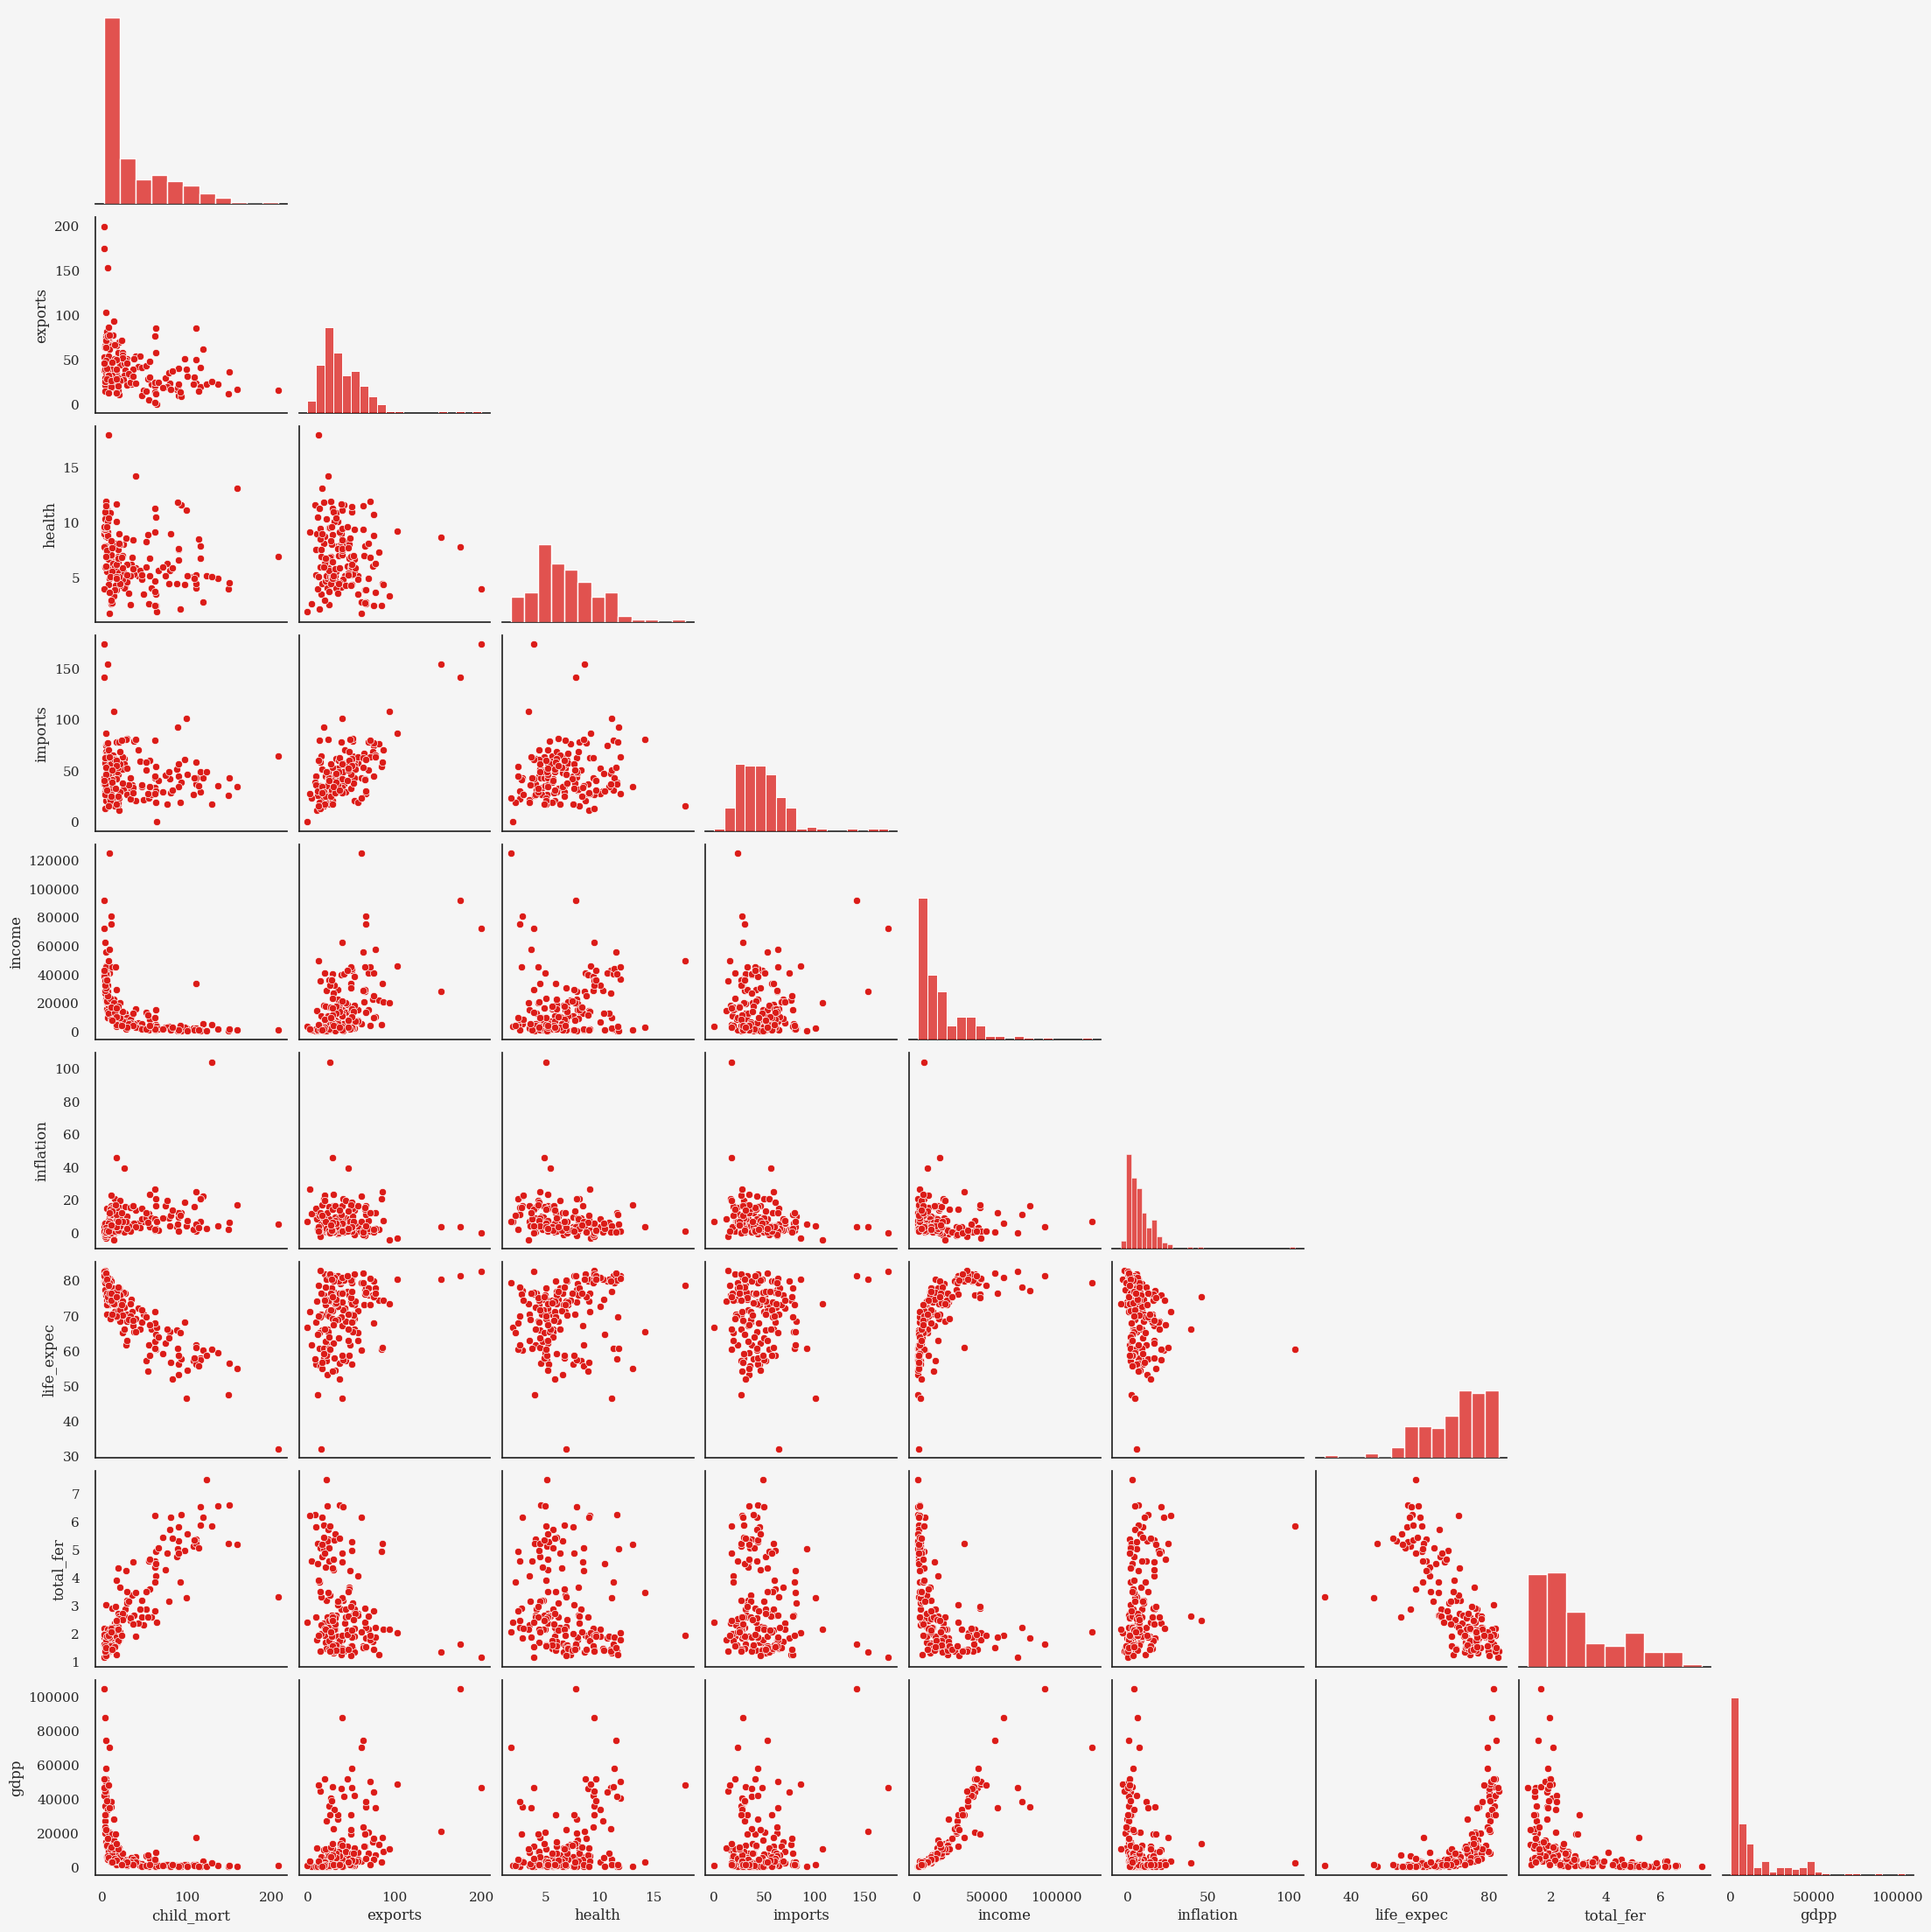

In [22]:
sns.pairplot(df, corner=True)

Observations:

1. Child_mort has negative relationship with GDP as the child mortality is less the GDP also increases and vice versa.
2. Export, Income, Income has clear postivite relationship with GDP.
3. Total_fer and child_mort has postive relationship.
4. total_fer and life_expec has negative relationship.
5. life_expec and childe_mort has negative relationship.

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

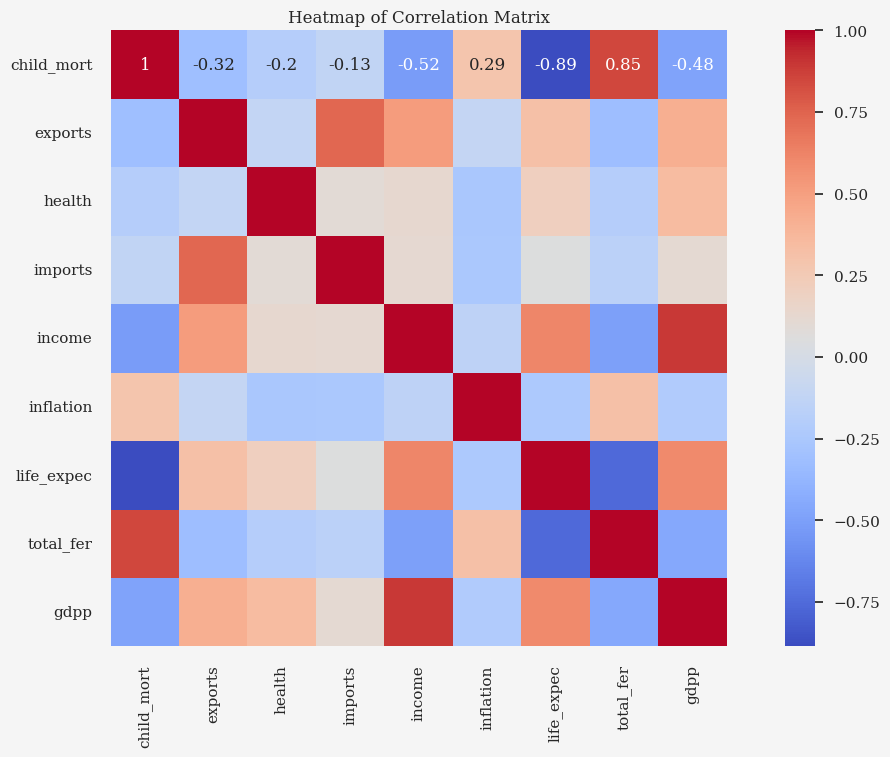

In [23]:
corr_matrix = df.select_dtypes(include='number').corr()

fig = plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\matrix.py:1124: UserWarning:

``square=True`` ignored in clustermap



Text(0.5, 1.0, 'Clustermap of Correlation Matrix')

<Figure size 1500x800 with 0 Axes>

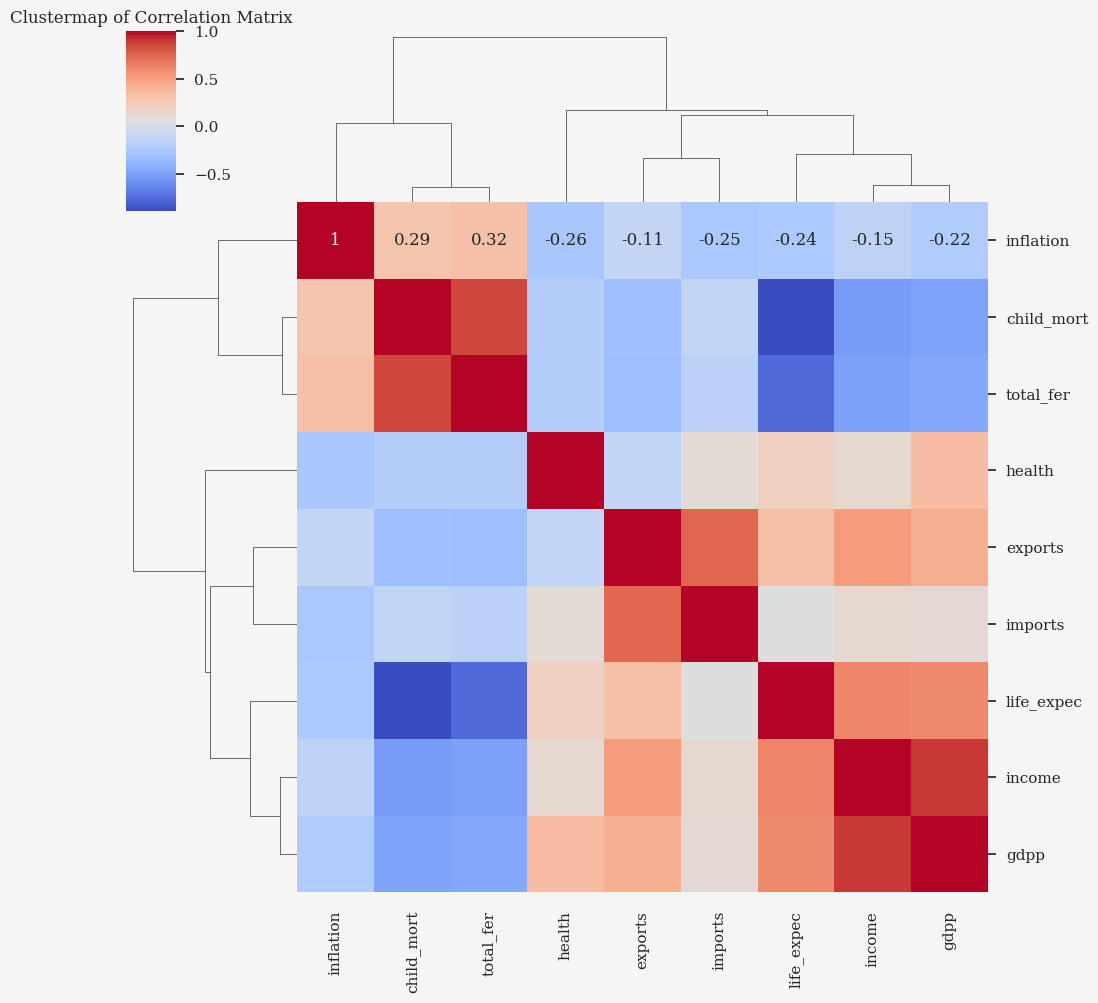

In [24]:
corr_matrix = df.select_dtypes(include='number').corr()

fig = plt.figure(figsize = (15,8))
sns.clustermap(corr_matrix, annot=True, square=True, cmap='coolwarm')
plt.title('Clustermap of Correlation Matrix')

Data Modeling

In [25]:
df_scaled = StandardScaler().fit_transform(df.drop(['country'], 
                                                  axis=1))

PCA - Principal component analysis`

In [26]:
decom = PCA(svd_solver = 'auto')
decom.fit(df_scaled)

PCA()

[0.46 0.63 0.76 0.87 0.94 0.96 0.97 0.98 0.99]


C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0, 0.5, 'explaned variance ratio')

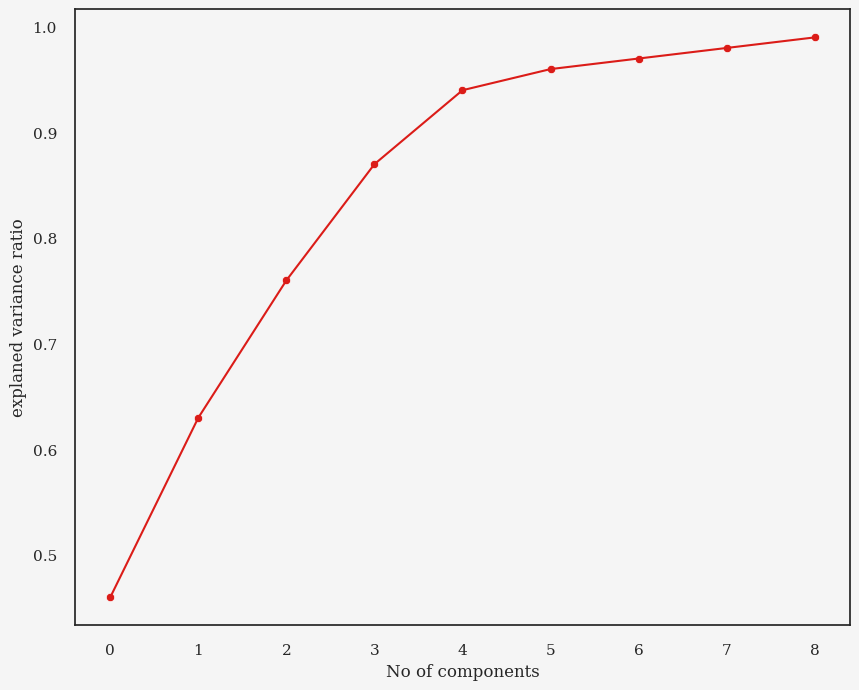

In [27]:
cum_exp_ratio = np.cumsum(np.round(decom.explained_variance_ratio_,2))
print(cum_exp_ratio)
fig=plt.figure(figsize=(10,8))
ax=sns.lineplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax=sns.scatterplot(y=cum_exp_ratio, x=np.arange(0,len(cum_exp_ratio)))
ax.set_xlabel('No of components')
ax.set_ylabel('explaned variance ratio')

PCA with number of clusters 3 and 4 as deviation in the variance ratio. even 5 also can be considerd as the difference is less. so, lets us try to use the 3,4,5 cluster combination in K_Mean clustering

Text(0.5, 0, 'Euclidean Distances')

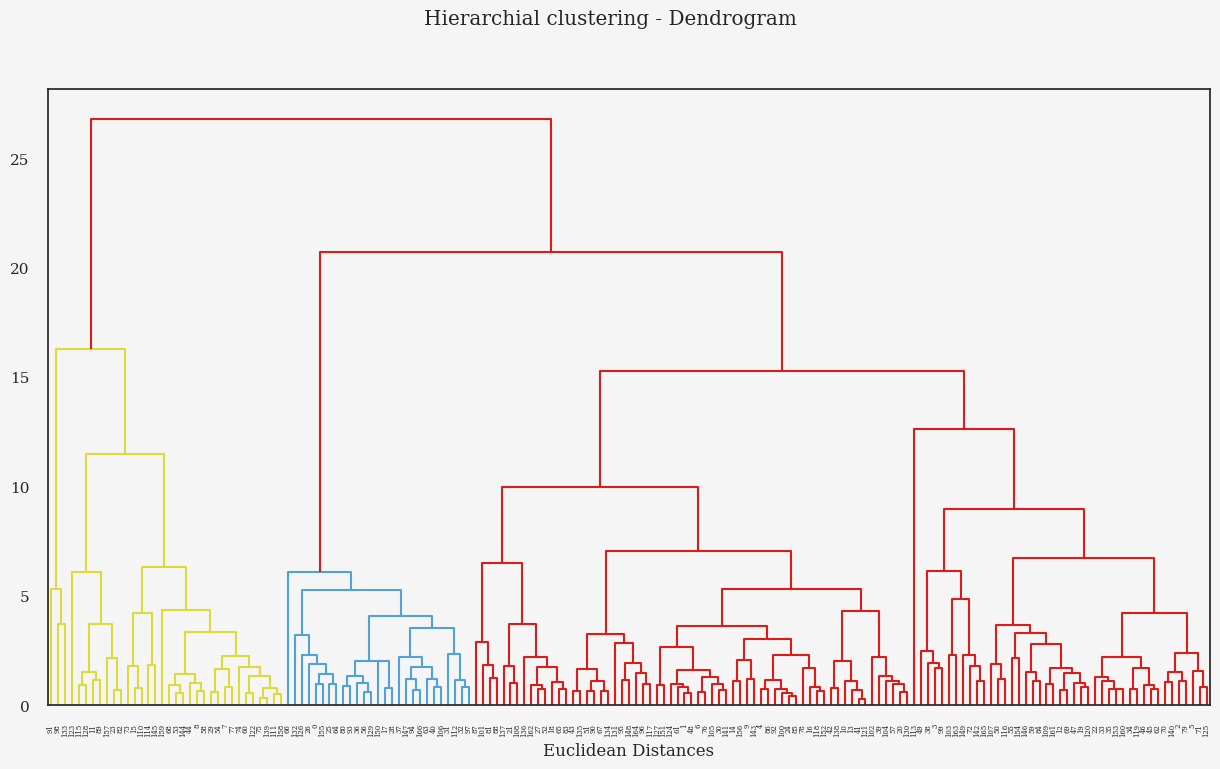

In [28]:
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Euclidean Distances')

We can clearly see that there 3 cluster

Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed. KMean is mostly commonly used clustering algorithm

C:\Users\danielkwakye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\danielkwakye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\danielkwakye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_

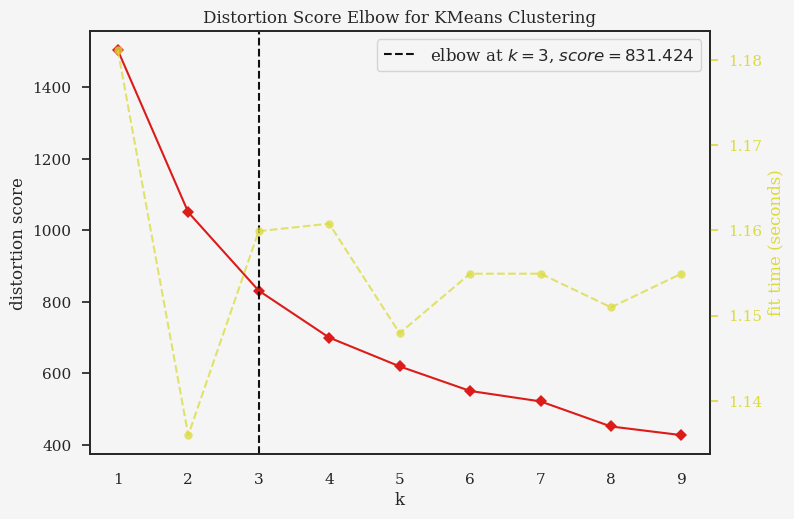

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans()
visualize = KElbowVisualizer(model, k=(1,10))
visualize.fit(df_scaled)
visualize.poof()

Elbow method is common method used to validate the clustering algorithm. here we can see the K value 3 with relatively good distortion score.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\danielkwakye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: xlabel='child_mort', ylabel='health'>

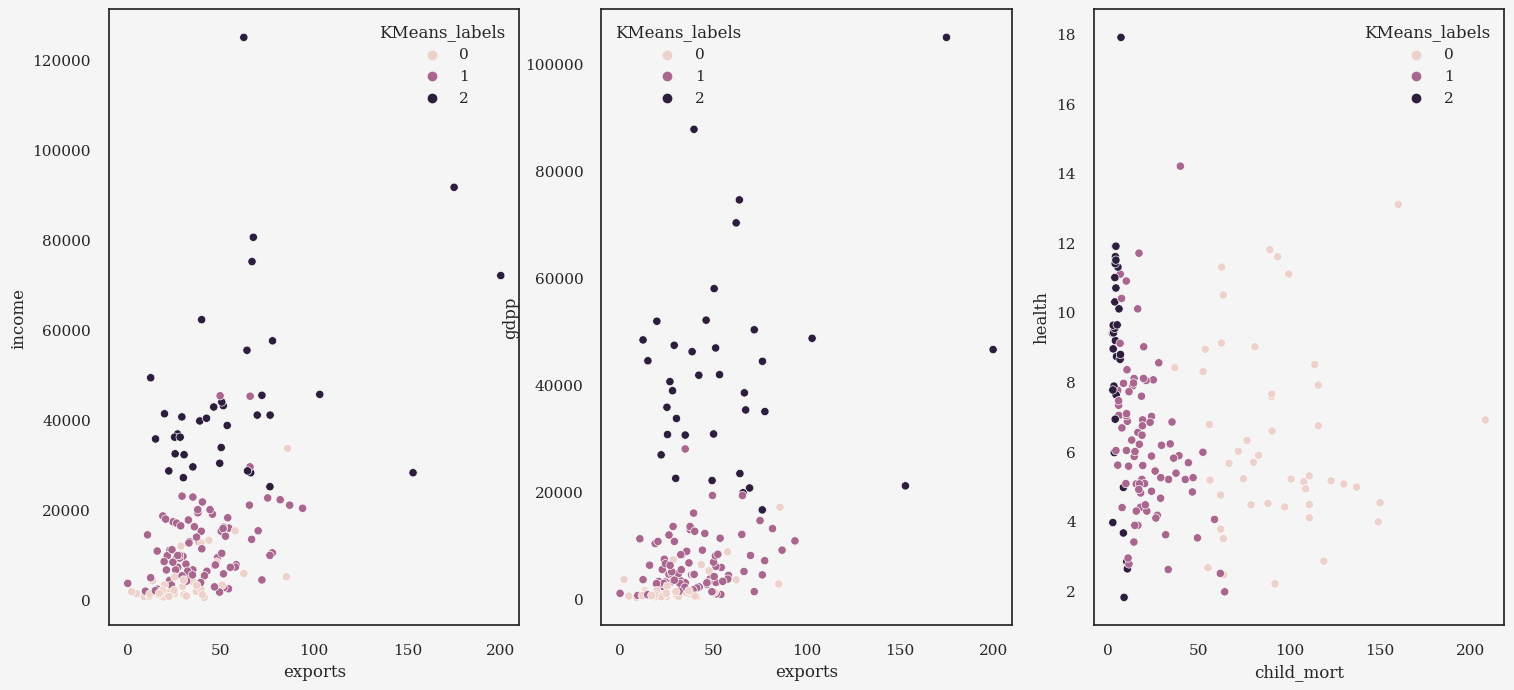

In [34]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaled)
df['KMeans_labels']=model.labels_
fig,ax=plt.subplots(nrows=1, ncols=3, figsize=(18,8))
sns.scatterplot(data=df, x='exports', y='income', hue='KMeans_labels', ax=ax[0])
sns.scatterplot(data=df, x='exports', y='gdpp', hue='KMeans_labels', ax=ax[1])
sns.scatterplot(data=df, x='child_mort', y='health', hue='KMeans_labels', ax=ax[2])

In [36]:
df.groupby(['KMeans_labels', 'country']).mean()

child_mort  exports  health  imports  \
KMeans_labels country                                                      
0             Afghanistan                 90.2     10.0    7.58     44.9   
              Angola                     119.0     62.3    2.85     42.9   
              Benin                      111.0     23.8    4.10     37.2   
              Botswana                    52.5     43.6    8.30     51.3   
              Burkina Faso               116.0     19.2    6.74     29.6   
...                                        ...      ...     ...      ...   
2             Sweden                       3.0     46.2    9.63     40.7   
              Switzerland                  4.5     64.0   11.50     53.3   
              United Arab Emirates         8.6     77.7    3.66     63.6   
              United Kingdom               5.2     28.2    9.64     30.8   
              United States                7.3     12.4   17.90     15.8   

                                     income  inflation  life_expec  total_fer  \
KMeans_labels country                                                           
0             Afghanistan            1610.0      9.440        56.2       5.82   
              Angola                 5900.0     22.400        60.1       6.16   
              Benin                  1820.0      0.885        61.8       5.36   
              Botswana              13300.0      8.920        57.1       2.88   
              Burkina Faso           1430.0      6.810        57.9       5.87   
...                                     ...        ...         ...        ...   
2             Sweden                42900.0      0.991        81.5       1.98   
              Switzerland           55500.0      0.317        82.2       1.52   
              United Arab Emirates  57600.0     12.500        76.5       1.87   
              United Kingdom        36200.0      1.570        80.3       1.92   
              United States         49400.0      1.220        78.7       1.93   

                                       gdpp  
KMeans_labels country                        
0             Afghanistan             553.0  
              Angola                 3530.0  
              Benin                   758.0  
              Botswana               6350.0  
              Burkina Faso            575.0  
...                                     ...  
2             Sweden                52100.0  
              Switzerland           74600.0  
              United Arab Emirates  35000.0  
              United Kingdom        38900.0  
              United States         48400.0  

[167 rows x 9 columns]

In [39]:
silhouette_score(df_scaled, labels=model.labels_)

0.28329575683463126

C:\Users\danielkwakye\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



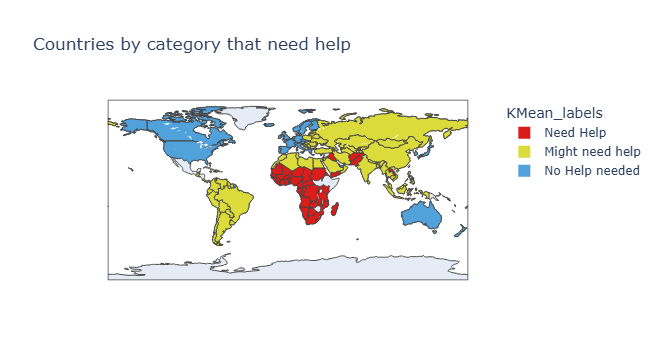

In [45]:
cat = {0:'Need Help',1:'Might need help',2:'No Help needed'}
df['KMean_labels']=df['KMean_labels'].map(cat)

px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular')

C:\Users\danielkwakye\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



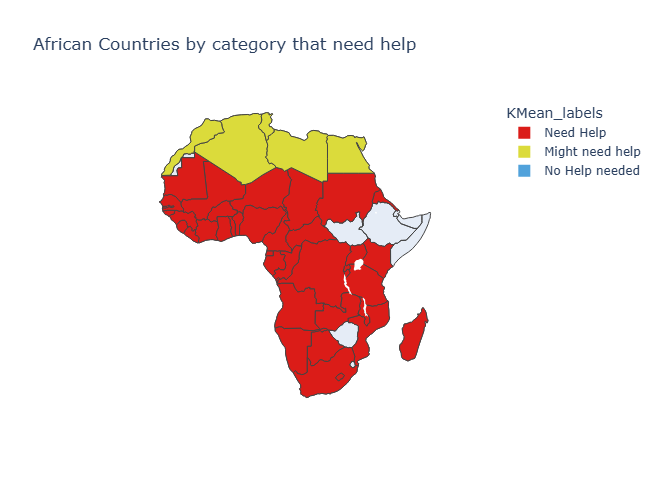

In [48]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='African Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='africa', height=500)

C:\Users\danielkwakye\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\danielkwakye\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



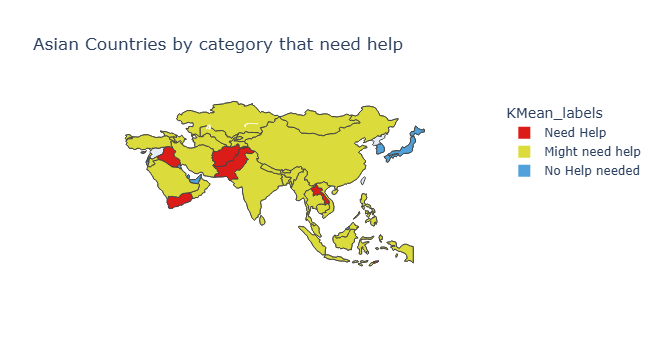

In [49]:
px.choropleth(data_frame=df, locationmode='country names', locations='country', color=df['KMean_labels'], title='Asian Countries by category that need help',
              color_discrete_map={'Need Help':'#DB1C18','Might need help':'#DBDB3B','No Help needed':'#51A2DB'} ,projection='equirectangular', scope='asia')


# Observations: I have clustred the countries in 3 categories.

Need Help
Might need help
No Help needed

Conclusion:

1. Most African countries and Pakistan, Afganistan, Iraq, Yemen, Lao etc falls in the category of "Help Needed" based on the GDP, Income, Health rate etc
2. Most Asian countires fall in 2nd category
3. American, Australian countires, Canada & Europian may not need help.

In [50]:
df[df['KMean_labels']=='Need Help']['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [54]:
df[df['KMean_labels']=='Need Help']['country'].count()

47